In [8]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("data/3610000301_databaseLoadingData.csv")
df.head()

,REF_DATE,GEO,DGUID,Investment income,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2010-01,Canada,2016A000011124,"Total investment income, receipts",Dollars,81,millions,6,v112599,1.1,14509,NaN,NaN,NaN,0
1,2010-04,Canada,2016A000011124,"Total investment income, receipts",Dollars,81,millions,6,v112599,1.1,14634,NaN,NaN,NaN,0
2,2010-07,Canada,2016A000011124,"Total investment income, receipts",Dollars,81,millions,6,v112599,1.1,15325,NaN,NaN,NaN,0
3,2010-10,Canada,2016A000011124,"Total investment income, receipts",Dollars,81,millions,6,v112599,1.1,17168,NaN,NaN,NaN,0
4,2011-01,Canada,2016A000011124,"Total investment income, receipts",Dollars,81,millions,6,v112599,1.1,16823,NaN,NaN,NaN,0


In [6]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print("")

REF_DATE
['2010-01' '2010-04' '2010-07' '2010-10' '2011-01' '2011-04' '2011-07'
 '2011-10' '2012-01' '2012-04' '2012-07' '2012-10' '2013-01' '2013-04'
 '2013-07' '2013-10' '2014-01' '2014-04' '2014-07' '2014-10' '2015-01'
 '2015-04' '2015-07' '2015-10' '2016-01' '2016-04' '2016-07' '2016-10'
 '2017-01' '2017-04' '2017-07' '2017-10' '2018-01' '2018-04' '2018-07'
 '2018-10' '2019-01' '2019-04' '2019-07' '2019-10' '2020-01' '2020-04'
 '2020-07' '2020-10' '2021-01' '2021-04' '2021-07' '2021-10' '2022-01'
 '2022-04' '2022-07' '2022-10' '2023-01' '2023-04' '2023-07' '2023-10'
 '2024-01' '2024-04' '2024-07' '2024-10' '2025-01']

GEO
['Canada']

DGUID
['2016A000011124']

Investment income
['Total investment income, receipts' 'Direct investment income, receipts'
 'Direct investment, interest, receipts'
 'Direct investment, profits, receipts'
 'Portfolio investment income, receipts'
 'Portfolio investment, interest on debt securities, receipts'
 'Portfolio investment, dividends on equity and inv

/var/folders/nh/zzct6yyd33xgwvxjryqtkw240000gn/T/ipykernel_3954/4209675536.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=annual_totals, x='Year', y='VALUE', palette='Blues_d')


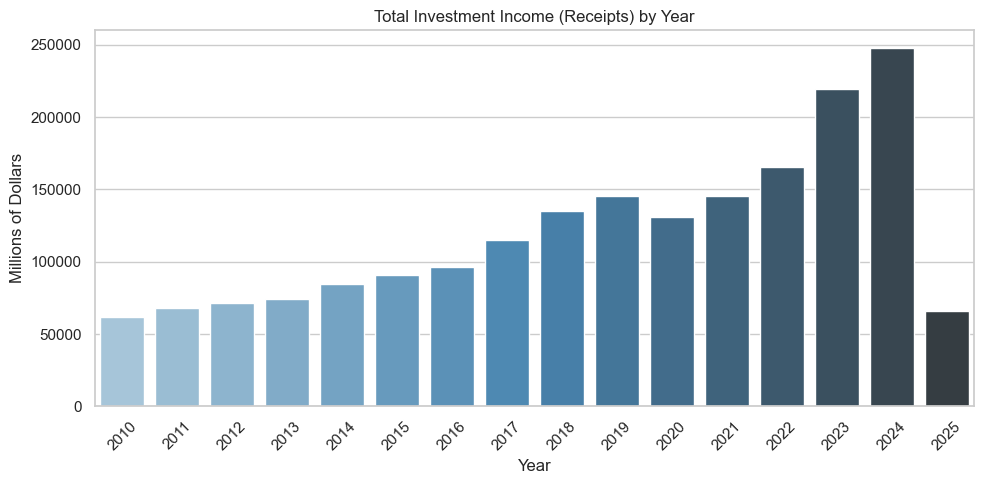

In [121]:
df['Year'] = df['REF_DATE'].dt.year
df['Quarter'] = df['REF_DATE'].dt.quarter

total_income = df[df['Investment income'] == 'Total investment income, receipts']

annual_totals = total_income.groupby('Year')['VALUE'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=annual_totals, x='Year', y='VALUE', palette='Blues_d')
plt.title('Total Investment Income (Receipts) by Year')
plt.ylabel('Millions of Dollars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

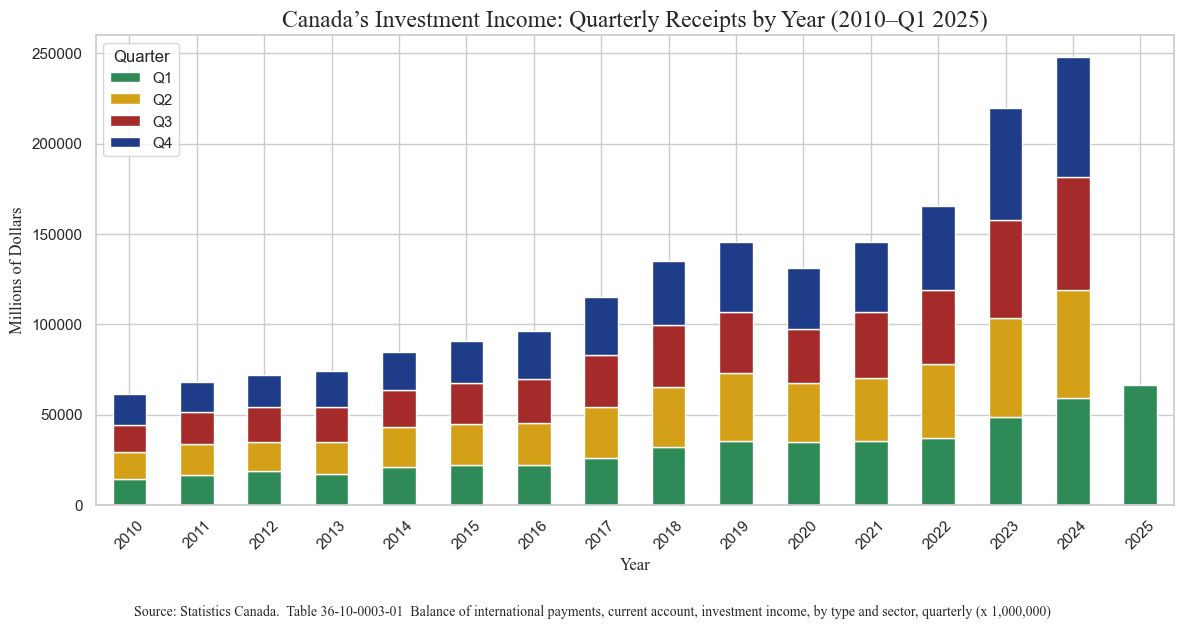

In [109]:
plot1_data = df[df['Investment income'] == 'Total investment income, receipts']

professional_colors = ['#1f3c88', '#2e8b8b', '#d4a017', '#a52a2a']  
professional_colors = ['#2e8b57', '#d4a017', '#a52a2a', '#1f3c88']


plot1_data.loc[:,'Year'] = plot1_data['REF_DATE'].dt.year
plot1_data.loc[:,'Quarter'] = plot1_data['REF_DATE'].dt.quarter

plot1_grouped = plot1_data.groupby(['Year', 'Quarter'])['VALUE'].sum().unstack()
plot1_grouped = plot1_grouped.reindex(range(2010, 2026), fill_value=0) 
plot1_grouped.index = plot1_grouped.index.astype(str)

fig, ax = plt.subplots(figsize=(12, 6))
plot1_grouped.plot(
    kind='bar', 
    stacked=True, 
    ax=ax, 
    #colormap='tab10', 
    color=professional_colors,
    #edgecolor='#606060'
    edgecolor="white"
)

ax.set_title("Canada’s Investment Income: Quarterly Receipts by Year (2010–Q1 2025)", 
             fontsize=17, fontname='Times New Roman')
ax.set_ylabel("Millions of Dollars", fontsize=12, fontname='Times New Roman')
ax.set_xlabel("Year", fontsize=12, fontname='Times New Roman')
ax.legend(title='Quarter', labels=['Q1', 'Q2', 'Q3', 'Q4'], 
          #bbox_to_anchor=(1.05, 1), 
          loc='upper left')
plt.xticks(rotation=45)

plt.figtext(0.5, -0.04,
            'Source: Statistics Canada.  Table 36-10-0003-01  Balance of international payments, current account, investment income, by type and sector, quarterly (x 1,000,000)',
            wrap=True, horizontalalignment='center', fontsize=10, fontname='Times New Roman', weight='medium')

plt.tight_layout()
#plt.savefig('Investment_Income_Quarterly_by_year.png', dpi=500, bbox_inches='tight')

plt.show()

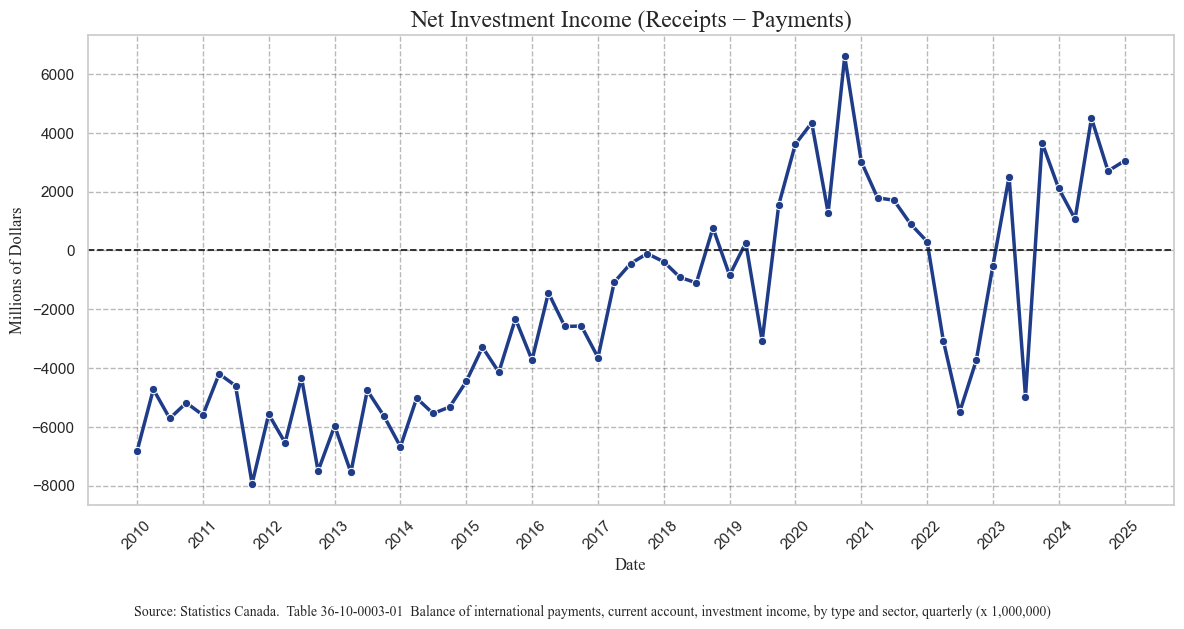

In [111]:
plot3_data = df[df['Investment income'] == 'Total investment income, balances']

plt.figure(figsize=(12, 6))
sns.lineplot(data=plot3_data, x='REF_DATE', y='VALUE', marker='o', linewidth=2.5, color='#1f3c88')

years = pd.date_range(start="2010-01-01", end="2025-12-31", freq='YS')
plt.xticks(ticks=years, labels=[d.year for d in years], rotation=45)

plt.axhline(0, linestyle='--', color='k', linewidth=1.25)
plt.title("Net Investment Income (Receipts − Payments)", 
                       fontsize=17, fontname='Times New Roman')
plt.ylabel("Millions of Dollars", fontsize=12, fontname='Times New Roman')
plt.xlabel("Date", fontsize=12, fontname='Times New Roman')
plt.grid(ls='--', c = 'k', alpha=0.3)
plt.figtext(0.5, -0.04,
            'Source: Statistics Canada.  Table 36-10-0003-01  Balance of international payments, current account, investment income, by type and sector, quarterly (x 1,000,000)',
            wrap=True, horizontalalignment='center', fontsize=10, fontname='Times New Roman', weight='medium')

plt.tight_layout()
#plt.savefig('Net_Investment.png', dpi=500, bbox_inches='tight')

plt.show()

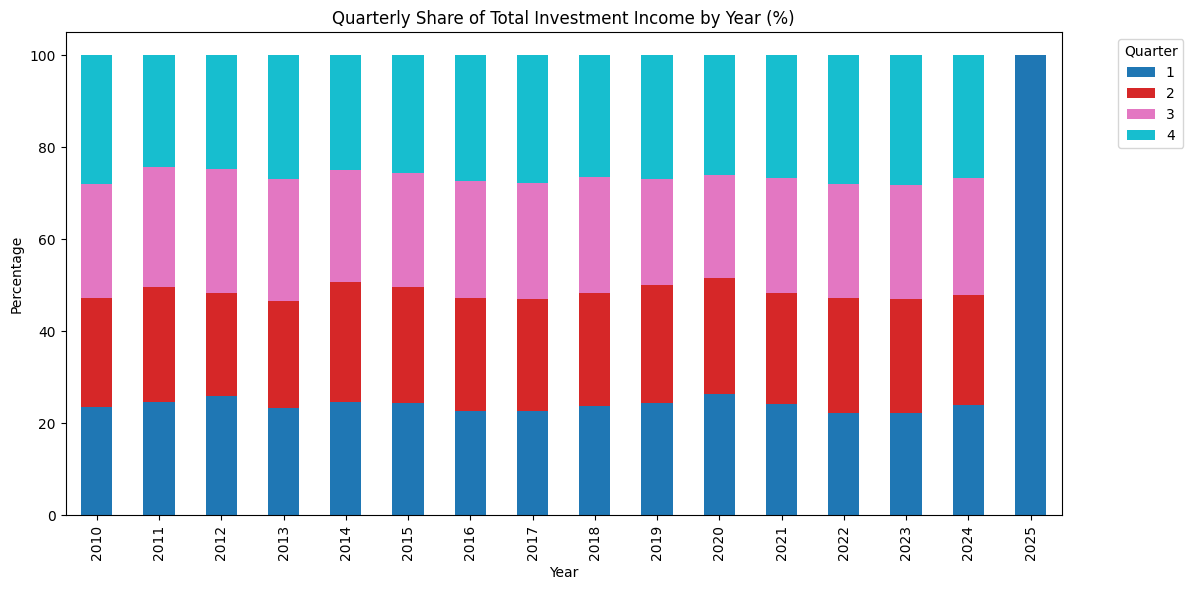

In [25]:
seasonal_pct = seasonal_totals.div(seasonal_totals.sum(axis=1), axis=0) * 100
seasonal_pct.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title('Quarterly Share of Total Investment Income by Year (%)')
plt.ylabel('Percentage')
plt.xlabel('Year')
plt.legend(title='Quarter', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

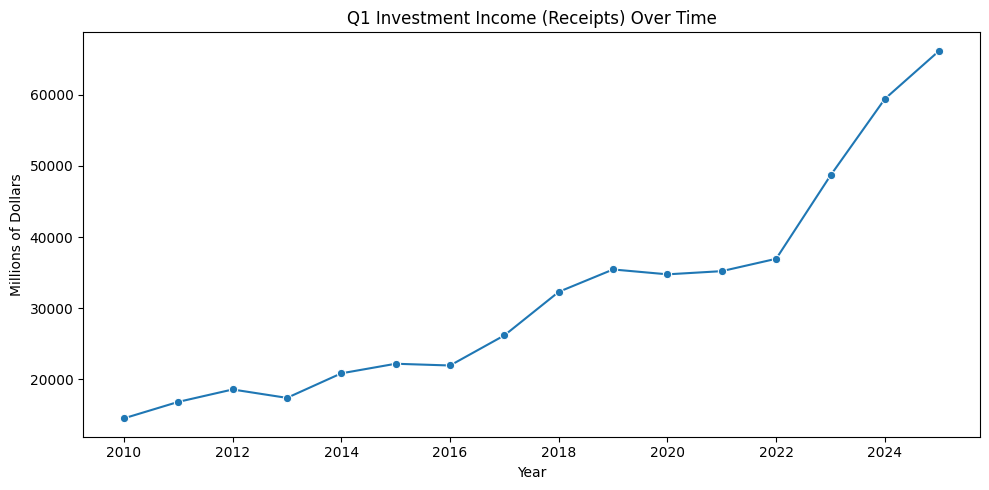

In [27]:
q1_data = total_income[total_income['Quarter'] == 1]
q1_totals = q1_data.groupby('Year')['VALUE'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=q1_totals, x='Year', y='VALUE', marker='o')
plt.title('Q1 Investment Income (Receipts) Over Time')
plt.ylabel('Millions of Dollars')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

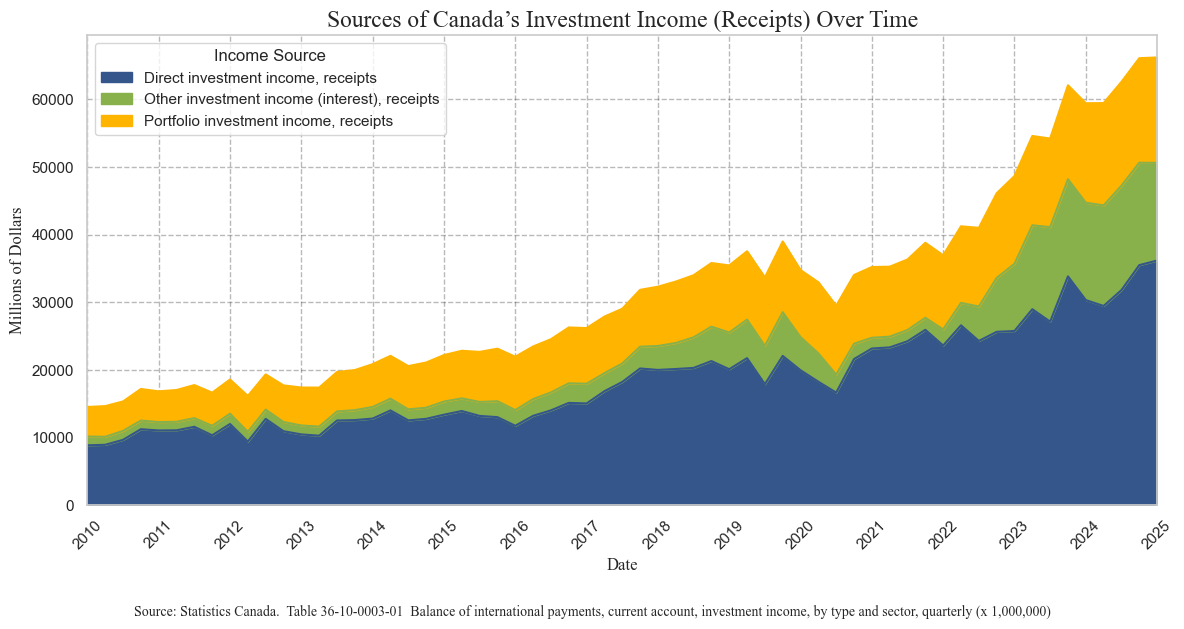

In [113]:
import matplotlib.pyplot as plt
import pandas as pd

plot2_data = df[df['Investment income'].isin([
    'Direct investment income, receipts',
    'Portfolio investment income, receipts',
    'Other investment income (interest), receipts'
])]

plot2_pivot = plot2_data.pivot_table(index='REF_DATE', columns='Investment income', values='VALUE')

#area_colors = {
#    'Direct investment income, receipts': '#1f77b4',  
#    'Portfolio investment income, receipts': '#ff7f0e',  
#    'Other investment income (interest), receipts': '#2ca02c' 
#}

area_colors = {
    'Direct investment income, receipts': '#34568B',
    'Portfolio investment income, receipts': '#FFB400', 
    'Other investment income (interest), receipts': '#88B04B'
}

#area_colors = {
#    'Direct investment income, receipts': '#006C67',     
#    'Portfolio investment income, receipts': '#4C4C47',  
#    'Other investment income (interest), receipts': '#5CA4A9' 
#}

#area_colors = {
#    'Direct investment income, receipts': '#6C7A89',          
#    'Portfolio investment income, receipts': '#A5937D',       
#    'Other investment income (interest), receipts': '#8DB580' 
#}


fig, ax = plt.subplots(figsize=(12, 6))
plot2_pivot.plot.area(
    stacked=True,
    ax=ax,
    color=[area_colors[col] for col in plot2_pivot.columns]
)

years = pd.date_range(start="2010-01-01", end="2025-12-31", freq='YS')
plt.xticks(ticks=years, labels=[d.year for d in years], rotation=45)

ax.set_title("Sources of Canada’s Investment Income (Receipts) Over Time",
             fontsize=17, fontname='Times New Roman')
ax.set_ylabel("Millions of Dollars", fontsize=12, fontname='Times New Roman')
ax.set_xlabel("Date", fontsize=12, fontname='Times New Roman')
plt.grid(ls='--', c = 'k', alpha=0.3)

ax.legend(title="Income Source", loc='upper left')

plt.figtext(0.5, -0.04,
            'Source: Statistics Canada.  Table 36-10-0003-01  Balance of international payments, current account, investment income, by type and sector, quarterly (x 1,000,000)',
            wrap=True, horizontalalignment='center', fontsize=10, fontname='Times New Roman', weight='medium')

plt.tight_layout()

#plt.savefig('Sources_Investment_Income.png', dpi=500, bbox_inches='tight')

plt.show()

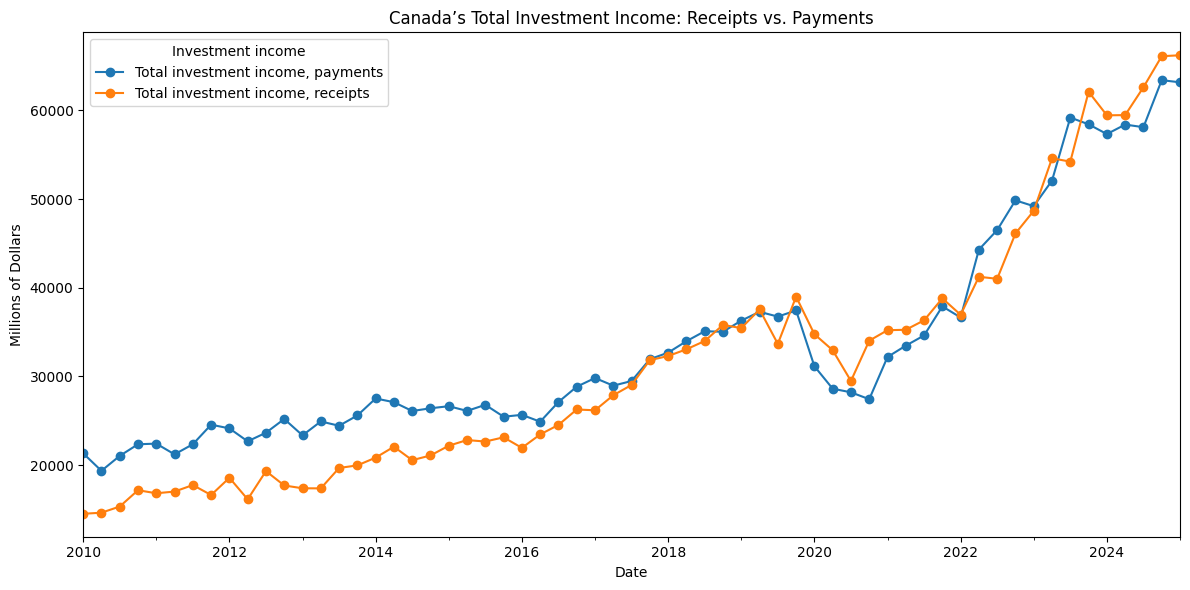

In [37]:
income_types = ['Total investment income, receipts', 'Total investment income, payments']
df_filtered = df[df['Investment income'].isin(income_types)]
pivot = df_filtered.pivot_table(index='REF_DATE', columns='Investment income', values='VALUE')

pivot.plot(figsize=(12, 6), marker='o')
plt.title('Canada’s Total Investment Income: Receipts vs. Payments')
plt.ylabel('Millions of Dollars')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

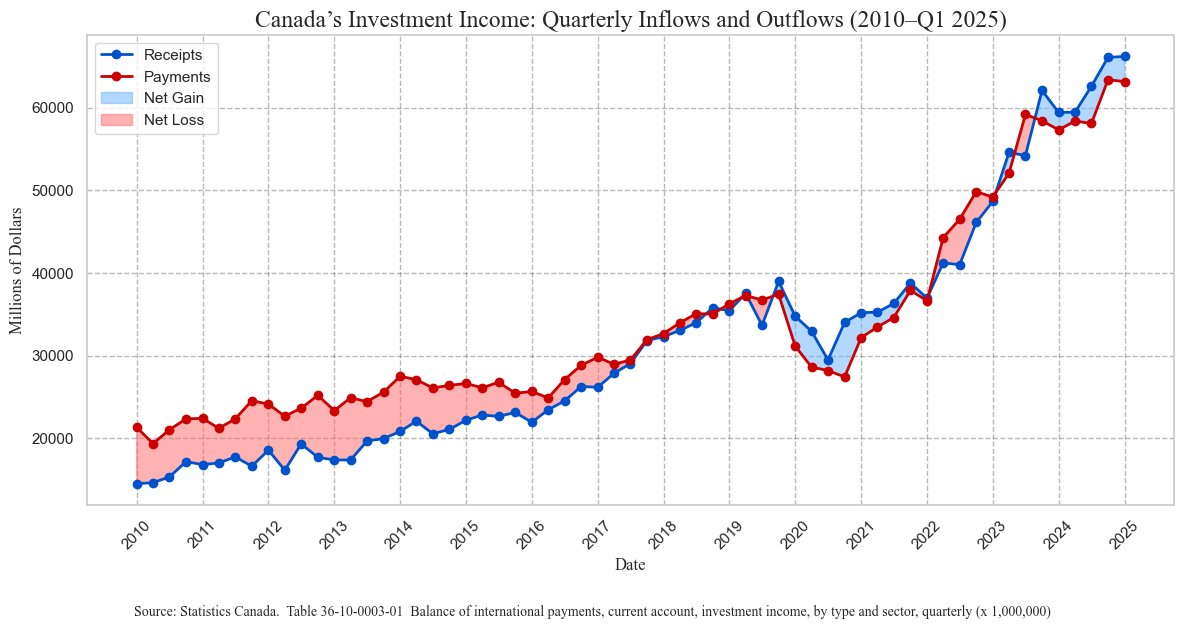

In [115]:
income_lines = df[df['Investment income'].isin([
    'Total investment income, receipts',
    'Total investment income, payments'
])]
pivot_income = income_lines.pivot_table(index='REF_DATE', columns='Investment income', values='VALUE')

plt.figure(figsize=(12, 6))

plt.plot(pivot_income.index, pivot_income['Total investment income, receipts'], 
         label='Receipts', color='#0052cc', linewidth=2, marker='o')
plt.plot(pivot_income.index, pivot_income['Total investment income, payments'], 
         label='Payments', color='#cc0000', linewidth=2, marker='o')

plt.fill_between(
    pivot_income.index,
    pivot_income['Total investment income, receipts'],
    pivot_income['Total investment income, payments'],
    where=pivot_income['Total investment income, receipts'] >= pivot_income['Total investment income, payments'],
    interpolate=True,
    color='#66b3ff',
    alpha=0.5,
    label='Net Gain'
)

plt.fill_between(
    pivot_income.index,
    pivot_income['Total investment income, receipts'],
    pivot_income['Total investment income, payments'],
    where=pivot_income['Total investment income, receipts'] < pivot_income['Total investment income, payments'],
    interpolate=True,
    color='#ff6666',
    alpha=0.5,
    label='Net Loss'
)

plt.title("Canada’s Investment Income: Quarterly Inflows and Outflows (2010–Q1 2025)",
         fontsize=17, fontname='Times New Roman')
plt.ylabel('Millions of Dollars', fontsize=12, fontname='Times New Roman')
plt.xlabel('Date', fontsize=12, fontname='Times New Roman')
plt.grid(ls='--', c = 'k', alpha=0.3)

years = pd.date_range(start="2010-01-01", end="2025-12-31", freq='YS')
plt.xticks(ticks=years, labels=[d.year for d in years], rotation=45)


plt.legend()#fontsize=10)

plt.figtext(0.5, -0.04,
            'Source: Statistics Canada.  Table 36-10-0003-01  Balance of international payments, current account, investment income, by type and sector, quarterly (x 1,000,000)',
            wrap=True, horizontalalignment='center', fontsize=10, fontname='Times New Roman', weight='medium')

plt.tight_layout()
#plt.savefig('Investment_Income_inflows_outflows.png', dpi=500, bbox_inches='tight')

plt.show()